In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing data
train_df = pd.read_csv("drive/My Drive/rossmann-store-sales/train.csv")
store_df = pd.read_csv("drive/My Drive/rossmann-store-sales/store.csv")
test_df = pd.read_csv("drive/My Drive/rossmann-store-sales/test.csv")


#EDA

##A close look at our data

In [4]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Let's check for null values

In [6]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [7]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
train_df.isna().sum

<bound method DataFrame.sum of          Store  DayOfWeek   Date  ...  Promo  StateHoliday  SchoolHoliday
0        False      False  False  ...  False         False          False
1        False      False  False  ...  False         False          False
2        False      False  False  ...  False         False          False
3        False      False  False  ...  False         False          False
4        False      False  False  ...  False         False          False
...        ...        ...    ...  ...    ...           ...            ...
1017204  False      False  False  ...  False         False          False
1017205  False      False  False  ...  False         False          False
1017206  False      False  False  ...  False         False          False
1017207  False      False  False  ...  False         False          False
1017208  False      False  False  ...  False         False          False

[1017209 rows x 9 columns]>

##Cleaning our data

In [10]:
#Merging both the Dataframes into one based on the "Store" ID
train_store=store_df.merge(train_df,on=["Store"],how="inner")
train_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [11]:
#checking for null values
train_store.isna().sum

<bound method DataFrame.sum of          Store  StoreType  Assortment  ...  Promo  StateHoliday  SchoolHoliday
0        False      False       False  ...  False         False          False
1        False      False       False  ...  False         False          False
2        False      False       False  ...  False         False          False
3        False      False       False  ...  False         False          False
4        False      False       False  ...  False         False          False
...        ...        ...         ...  ...    ...           ...            ...
1017204  False      False       False  ...  False         False          False
1017205  False      False       False  ...  False         False          False
1017206  False      False       False  ...  False         False          False
1017207  False      False       False  ...  False         False          False
1017208  False      False       False  ...  False         False          False

[1017209 rows x 18 c

There are missing values  in the columns; CompetitionOpenSinceMonth,CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval and Competition Distance

In [12]:
#Dropping columns
train_store=train_store.drop(columns=["PromoInterval","Promo2SinceWeek","Promo2SinceYear","CompetitionOpenSinceMonth","CompetitionOpenSinceYear"])

In [13]:
#Handling NaN
train_store["CompetitionDistance"]=train_store["CompetitionDistance"].fillna(train_store["CompetitionDistance"].mode()[0])

##Outliers

In [14]:
train_store["Sales"]=train_store["Sales"].apply(lambda x: 20000 if x>20000 else x)
train_store["Customers"]=train_store["Customers"].apply(lambda y: 3000 if y>3000 else y)
print(max(train_store["Sales"]))
print(max(train_store["Customers"]))

20000
3000


##Extracting Time

In [15]:
train_store["Date"]=pd.to_datetime(train_store["Date"])
train_store["Year"]=train_store["Date"].dt.year
train_store["Month"]=train_store["Date"].dt.month
train_store["Day"]=train_store["Date"].dt.day
train_store["Week"]=train_store["Date"].dt.week%4
train_store["Season"] = np.where(train_store["Month"].isin([3,4]),"Spring",np.where(train_store["Month"].isin([5,6,7,8]), "Summer",np.where(train_store["Month"].isin ([9,10,11]),"Fall",np.where(train_store["Month"].isin ([12,1,2]),"Winter","None"))))
train_store

,Store,StoreType,Assortment,CompetitionDistance,Promo2,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,Season
0,1,c,a,1270.0,0,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,Summer
1,1,c,a,1270.0,0,4,2015-07-30,5020,546,1,1,0,1,2015,7,30,3,Summer
2,1,c,a,1270.0,0,3,2015-07-29,4782,523,1,1,0,1,2015,7,29,3,Summer
3,1,c,a,1270.0,0,2,2015-07-28,5011,560,1,1,0,1,2015,7,28,3,Summer
4,1,c,a,1270.0,0,1,2015-07-27,6102,612,1,1,0,1,2015,7,27,3,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,1,6,2013-01-05,4771,339,1,0,0,1,2013,1,5,1,Winter
1017205,1115,d,c,5350.0,1,5,2013-01-04,4540,326,1,0,0,1,2013,1,4,1,Winter
1017206,1115,d,c,5350.0,1,4,2013-01-03,4297,300,1,0,0,1,2013,1,3,1,Winter
1017207,1115,d,c,5350.0,1,3,2013-01-02,3697,305,1,0,0,1,2013,1,2,1,Winter


##Seasonality

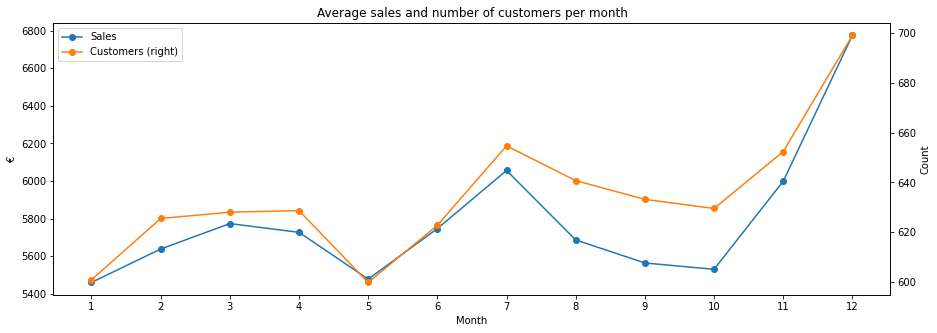

In [21]:
ax = train_store.groupby('Month')[['Sales', 'Customers']].mean().plot(secondary_y=['Customers'], figsize=(15,5), marker='o')
ax.set_ylabel('€')
ax.right_ax.set_ylabel('Count')
ax.set_xticks(range(1,13))
plt.title('Average sales and number of customers per month');

##Correlation

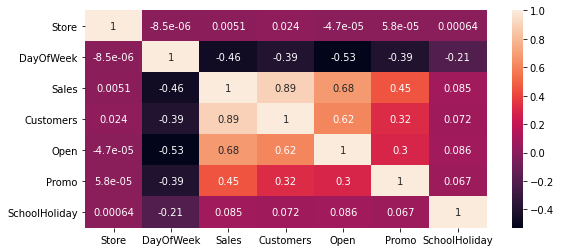

In [22]:
fig_dims = (9, 4)
fig, ax = plt.subplots(figsize=fig_dims)
corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True,ax=ax)

plt.show()

##How Does Promos affect Sales?

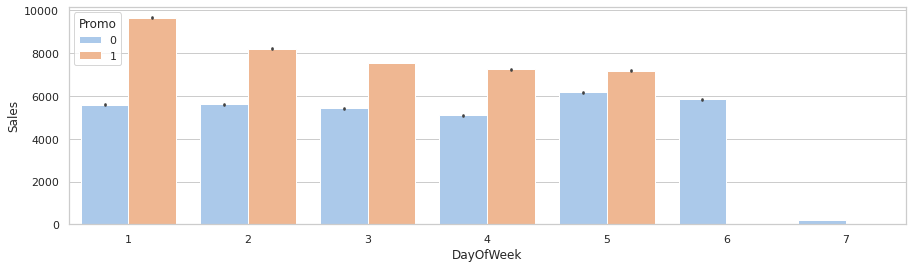

In [23]:
plt.figure(figsize=(15,4))
sns.set(style="whitegrid",palette="pastel",color_codes=True)
sns.barplot(x="DayOfWeek",y="Sales",hue="Promo", data=train_store)

##Stores Open all Weekdays

<Figure size 1584x864 with 0 Axes>

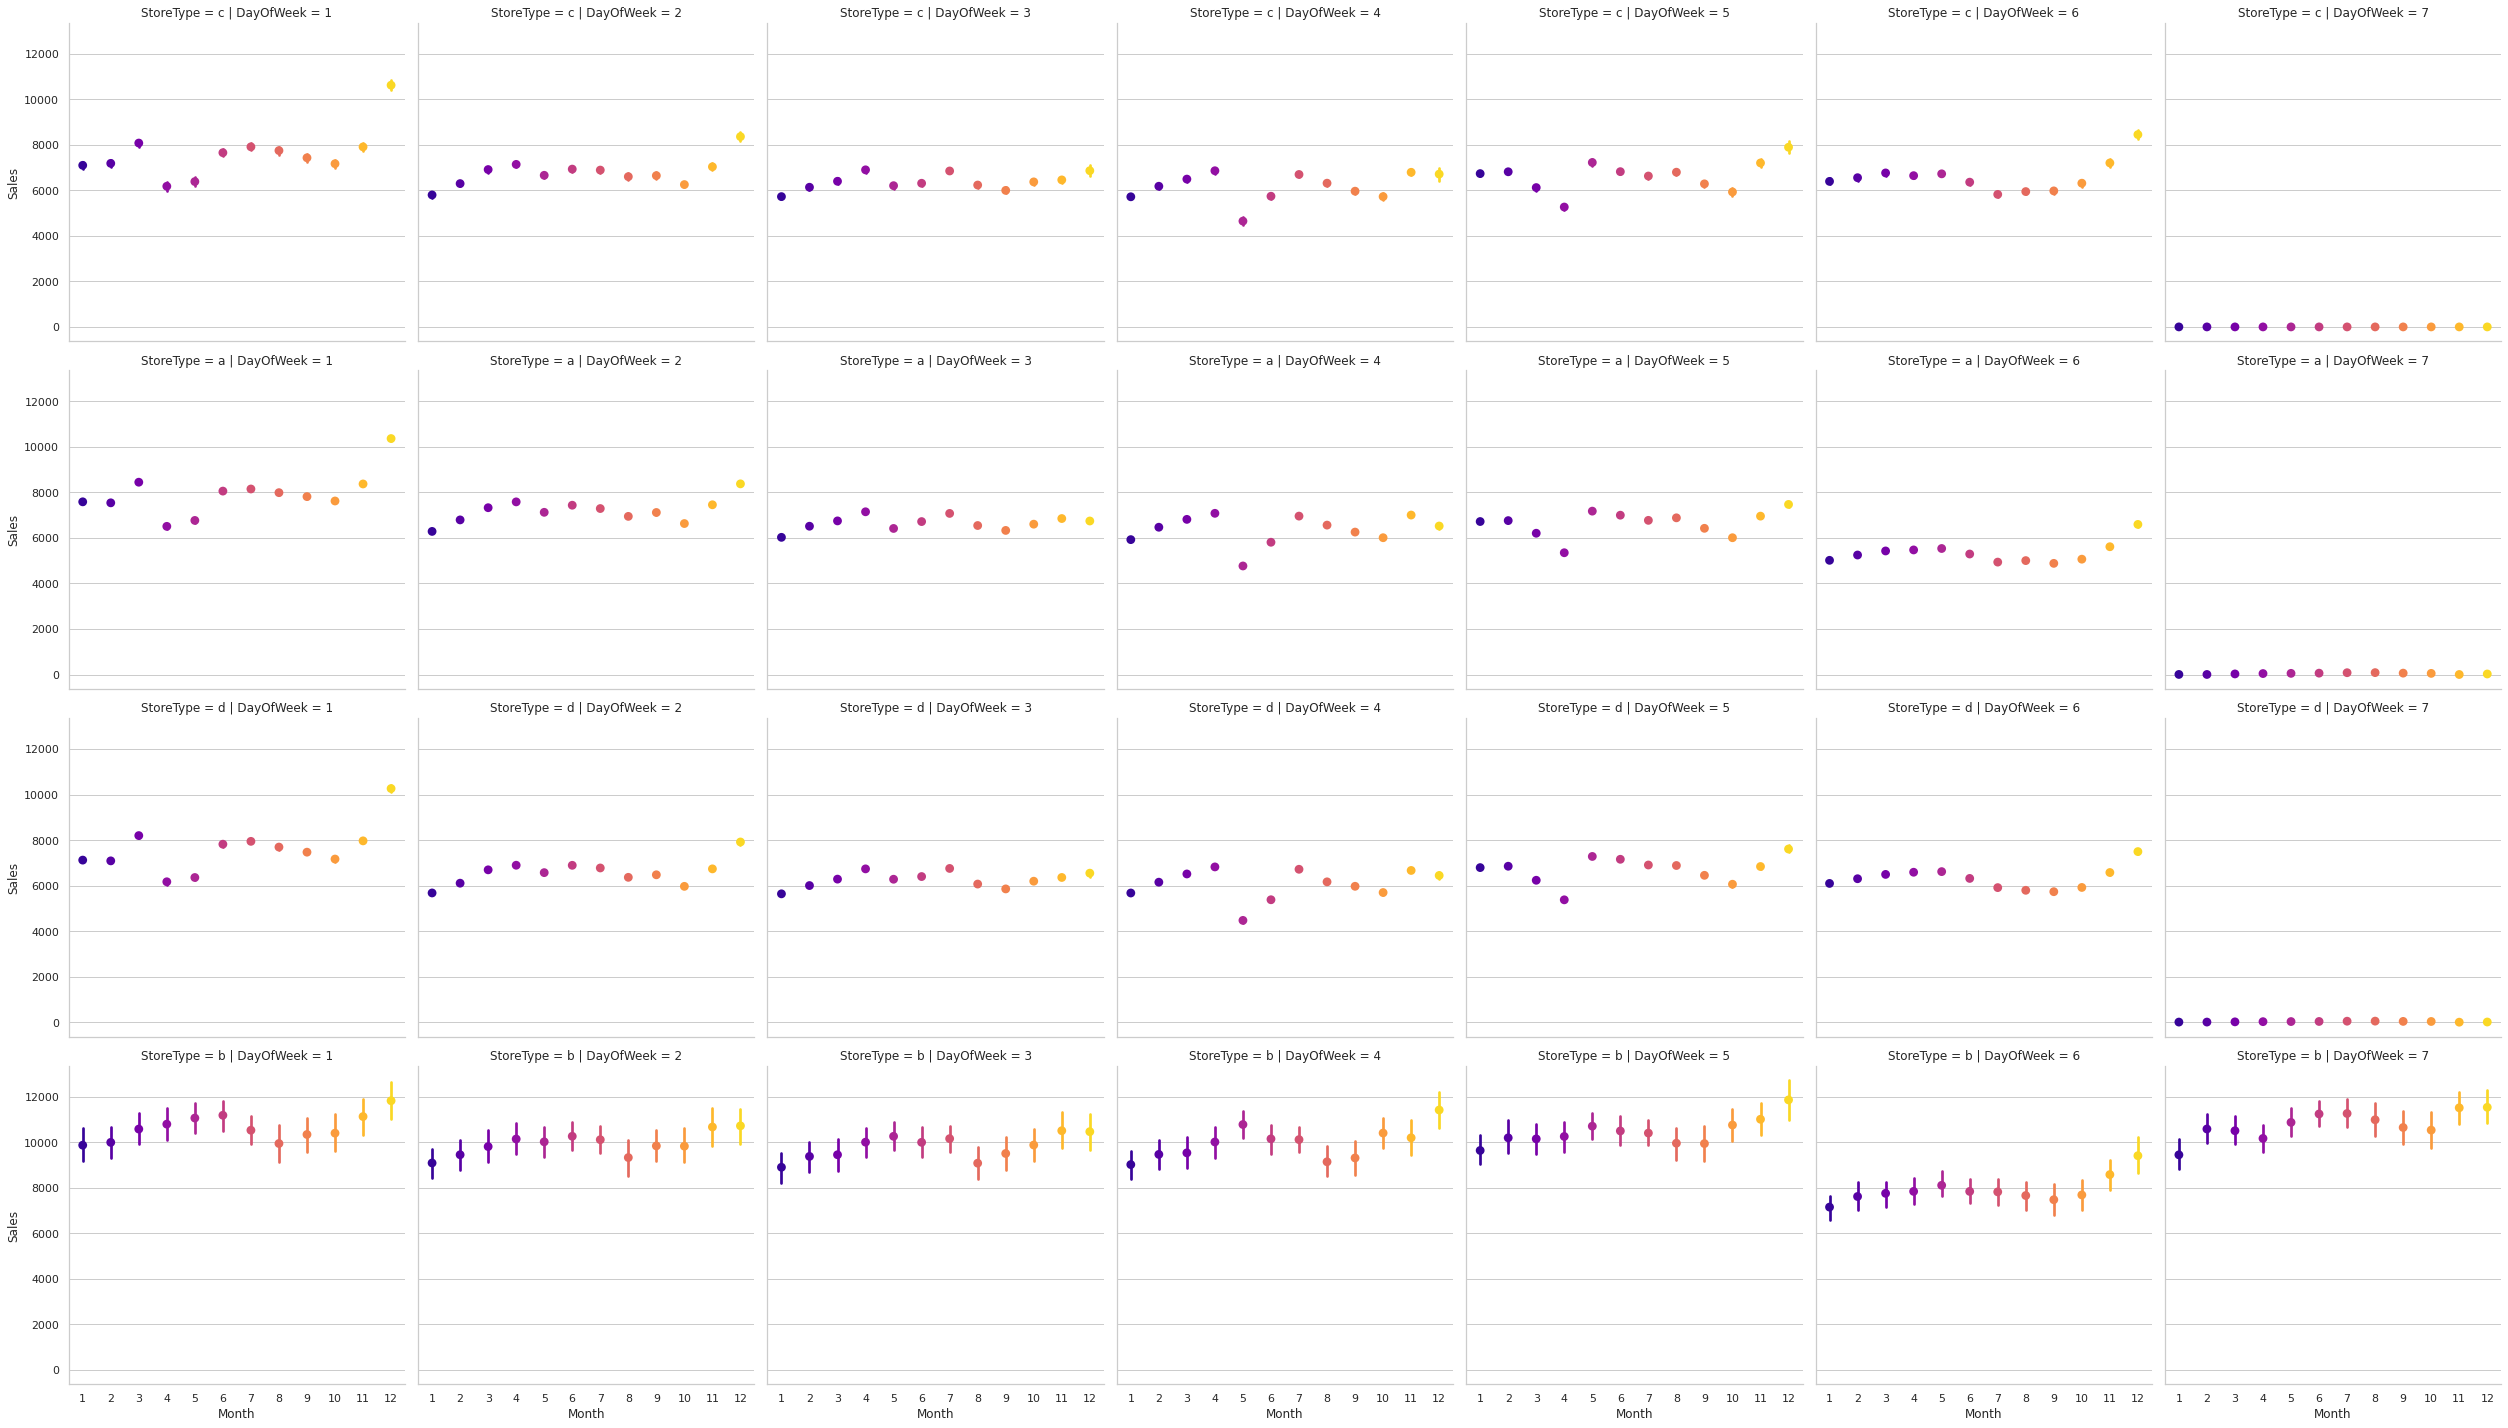

In [24]:
plt.figure(figsize = (22, 12))
sns.factorplot(data = train_store, x = 'Month', y = 'Sales',
              col = 'DayOfWeek', # per store type in cols
              palette = 'plasma',
              row = 'StoreType', # per store type in rows
             )
#plt.savefig('weekdayopen.png')
plt.show()  

##Assortment

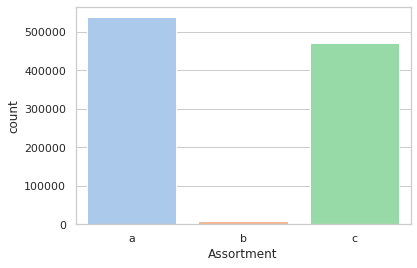

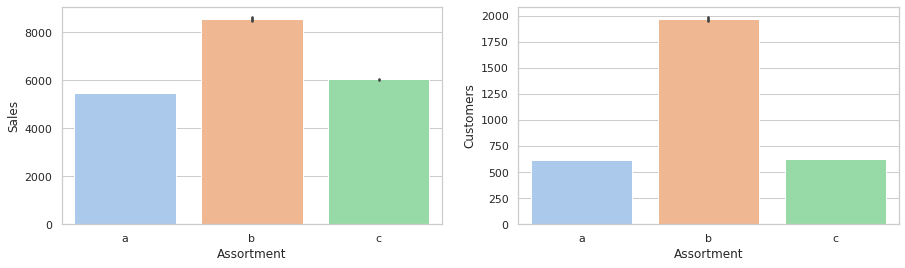

In [25]:
sns.countplot(x='Assortment', data=train_store, order=['a','b','c'])

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=train_store, order=['a','b','c'], ax=axis1)
sns.barplot(x='Assortment', y='Customers', data=train_store, order=['a','b','c'], ax=axis2)

##Competition

Checking how competition distance affects sales

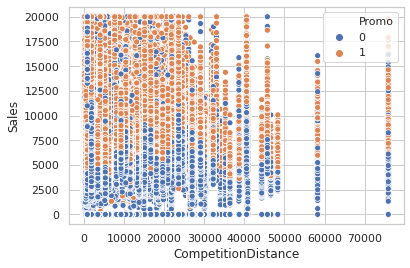

In [26]:
sns.set(style="whitegrid")
g=sns.scatterplot(x="CompetitionDistance", y="Sales", hue="Promo", data=train_store)
# g.fig.set_size_inches(15,4)

In [ ]:
# train_store.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))


#Linear Regression to Predict Sales

##Categorical Data
The columns StoreType, Assortment, Season have char type or String type values, all of this need to converted to a numerical value before we run our model



In [30]:
numerical_data_col=["Store","Competition Distance","Promo2","DayOfWeek","Sales","Customers","Open","SchoolHoliday","Year","Month","Day","Week"]
categorical_data_col=["StoreType","Assortment","Season"]

In [31]:
for i in categorical_data_col:
    p=0
    for j in train_store[i].unique():
        train_store[i]=np.where(train_store[i]==j,p,train_store[i])
        p=p+1

    train_store[i]=train_store[i].astype(int)

In [32]:
train_store["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [33]:
train_store["StateHoliday"]=np.where(train_store["StateHoliday"] == '0' ,0,1)
train_store["StateHoliday"]=train_store["StateHoliday"].astype(int)

In [36]:
train_store.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,Season
0,1,0,0,1270.0,0,5,5263,555,1,1,0,1,2015,7,31,3,0
1,1,0,0,1270.0,0,4,5020,546,1,1,0,1,2015,7,30,3,0
2,1,0,0,1270.0,0,3,4782,523,1,1,0,1,2015,7,29,3,0
3,1,0,0,1270.0,0,2,5011,560,1,1,0,1,2015,7,28,3,0
4,1,0,0,1270.0,0,1,6102,612,1,1,0,1,2015,7,27,3,0


In [35]:
# train_store=train_store.drop(columns=["Date"])
# train_store.shape

KeyError: ignored

In [37]:
#Splitting of data
features=train_store[["Customers","Open","Promo","Assortment","SchoolHoliday","StoreType","Week","Month"]]
features=preprocessing.scale(features)
target=train_store["Sales"]
X_train,X_test,Y_train,Y_test=train_test_split(features,target)

In [38]:
model1=LinearRegression()
model1.fit(X_train,Y_train)
print(model1.score(X_test,Y_test))

0.8602579013925197


In [39]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model1, open(filename, 'wb'))

##Predict Sales using Facebook Prophet

In [40]:
df = pd.read_csv("drive/My Drive/rossmann-store-sales/train.csv",
                       low_memory = False)
#lets only have open stores with sells
df = df[(df["Open"] != 0) & (df['Sales'] != 0)]
# sales for the store number 1 (StoreType C)
sales = df[df.Store==1].loc[:, ['Date', 'Sales']]
# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

# to datetime64
sales['Date'] = pd.DatetimeIndex(sales['Date'])
sales.dtypes


Date     datetime64[ns]
Sales             int64
dtype: object

In [41]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [42]:
sales = sales.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})
sales.head()

,ds,y
1014980,2013-01-02,5530
1013865,2013-01-03,4327
1012750,2013-01-04,4486
1011635,2013-01-05,4997
1009405,2013-01-07,7176


In [43]:
from fbprophet import Prophet
m = Prophet()
m.stan_backend.logger = None

m.fit(sales)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
future = m.make_future_dataframe(periods=6*7)
future.tail()

,ds
818,2015-09-07
819,2015-09-08
820,2015-09-09
821,2015-09-10
822,2015-09-11


In [45]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
818,2015-09-07,4490.544574,3463.081623,5544.923053
819,2015-09-08,3982.072169,2881.715370,4969.257082
820,2015-09-09,3849.165261,2766.486406,4831.820685
821,2015-09-10,3746.313217,2634.838296,4798.526017
822,2015-09-11,3990.503921,2924.357280,5072.440574


In [46]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5233.606850,4462.765883,6662.307370,5233.606850,5233.606850,326.914183,326.914183,326.914183,-219.648835,-219.648835,-219.648835,546.563018,546.563018,546.563018,0.0,0.0,0.0,5560.521033
1,2013-01-03,5232.198256,4338.084887,6386.286240,5232.198256,5232.198256,108.923125,108.923125,108.923125,-309.090443,-309.090443,-309.090443,418.013568,418.013568,418.013568,0.0,0.0,0.0,5341.121381
2,2013-01-04,5230.789662,4335.431960,6619.812513,5230.789662,5230.789662,240.493562,240.493562,240.493562,-54.528862,-54.528862,-54.528862,295.022424,295.022424,295.022424,0.0,0.0,0.0,5471.283224
3,2013-01-05,5229.381068,4433.141737,6726.955098,5229.381068,5229.381068,329.719248,329.719248,329.719248,150.705304,150.705304,150.705304,179.013944,179.013944,179.013944,0.0,0.0,0.0,5559.100316
4,2013-01-07,5226.563879,4605.042343,6788.953636,5226.563879,5226.563879,360.760881,360.760881,360.760881,387.931179,387.931179,387.931179,-27.170299,-27.170299,-27.170299,0.0,0.0,0.0,5587.324760


In [47]:
predict_df= pd.DataFrame({'Store_Id': df['Store'],
                            'date':forecast['ds'], 
                          'Sales': forecast['yhat']})



In [48]:
predict_df1=predict_df.truncate( after=822)


In [49]:
predict_df1.tail()

,Store_Id,date,Sales
818,819.0,2015-09-07,4490.544574
819,820.0,2015-09-08,3982.072169
820,821.0,2015-09-09,3849.165261
821,822.0,2015-09-10,3746.313217
822,823.0,2015-09-11,3990.503921


In [50]:
predict_df1.to_csv("submission1.csv", index = False)

In [51]:
filename1 = 'prophet_model.sav'
pickle.dump(m, open(filename1, 'wb'))

In [52]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.8602579013925197
